In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/product_list.csv")
df.head()

,MMC,Product_BusinessUnitDesc
0,010M03A1116X9000,W RTW
1,010M09A1101X0863,W RTW
2,010M27A0006X0200,W RTW
3,011A11A1166X4150,W RTW
4,011A11A1166X9000,W RTW


In [10]:
df.describe()

,MMC,Product_BusinessUnitDesc
count,2767,2767
unique,2767,6
top,WLDRS2UXR30B0,W Bags
freq,1,830


In [12]:
print("Number of unique MMC", len(df["MMC"].unique()))

Number of unique MMC 2767


In [17]:
print("Number of categories", len(df["Product_BusinessUnitDesc"].unique()))
print("Categories: ",df["Product_BusinessUnitDesc"].unique())

Number of categories 6
Categories:  ['W RTW' 'W SLG' 'W Bags' 'W Shoes' 'Watches' 'W Accessories']


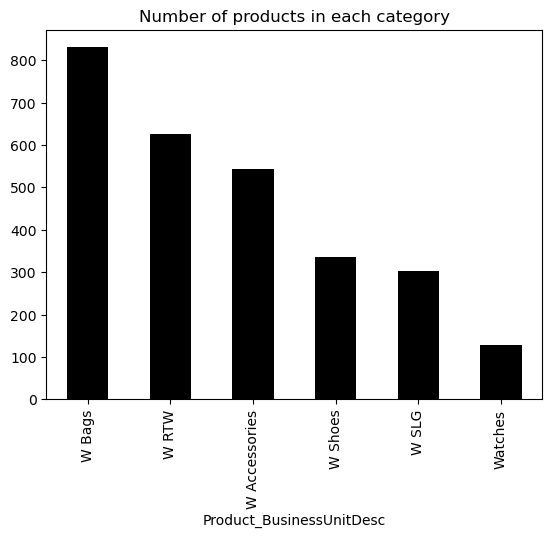

In [21]:
# Plot histogram of Cateogry
df["Product_BusinessUnitDesc"].value_counts().plot(kind='bar', color="black")
plt.title("Number of products in each category")
plt.show()

In [30]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

IMAGE_DIR = "data/DAM/"
CSV_PATH = "data/product_list.csv"

def compute_histogram(image_path, bins=256):
    """Compute a normalized color histogram for an image."""
    with Image.open(image_path) as img:
        img = img.convert("RGB")  # Ensure image is in RGB mode
        # Separate channels
        r, g, b = img.split()
        # Compute histograms for each channel
        r_hist = np.histogram(np.array(r).flatten(), bins=bins, range=(0, 256), density=True)[0]
        g_hist = np.histogram(np.array(g).flatten(), bins=bins, range=(0, 256), density=True)[0]
        b_hist = np.histogram(np.array(b).flatten(), bins=bins, range=(0, 256), density=True)[0]
        # Combine histograms
        return r_hist, g_hist, b_hist

def aggregate_histograms_by_category(image_dir, csv_path):
    """Aggregate color histograms based on categories from a CSV file."""
    # Load the CSV file
    data = pd.read_csv(csv_path)
    categories = data["Product_BusinessUnitDesc"].unique()
    category_histograms = {category: {"r_hist": np.zeros(256), "g_hist": np.zeros(256), "b_hist": np.zeros(256)} for category in categories}
    category_counts = {category: 0 for category in categories}

    print("Processing images by categories...")
    for _, row in tqdm(data.iterrows(), total=len(data)):
        image_name = row["MMC"] + ".jpeg"
        category = row["Product_BusinessUnitDesc"]
        image_path = os.path.join(image_dir, image_name)

        if not os.path.exists(image_path):
            print(f"Warning: Image {image_name} not found!")
            continue

        try:
            r_hist, g_hist, b_hist = compute_histogram(image_path)
            category_histograms[category]["r_hist"] += r_hist
            category_histograms[category]["g_hist"] += g_hist
            category_histograms[category]["b_hist"] += b_hist
            category_counts[category] += 1
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

    # Normalize histograms by the number of images in each category
    for category in categories:
        if category_counts[category] > 0:
            category_histograms[category]["r_hist"] /= category_counts[category]
            category_histograms[category]["g_hist"] /= category_counts[category]
            category_histograms[category]["b_hist"] /= category_counts[category]

    return category_histograms

# Compute and display histograms
category_histograms = aggregate_histograms_by_category(IMAGE_DIR, CSV_PATH)


Processing images by categories...


 79%|███████▉  | 2190/2767 [00:04<00:01, 494.43it/s]

100%|██████████| 2767/2767 [00:05<00:00, 512.29it/s]


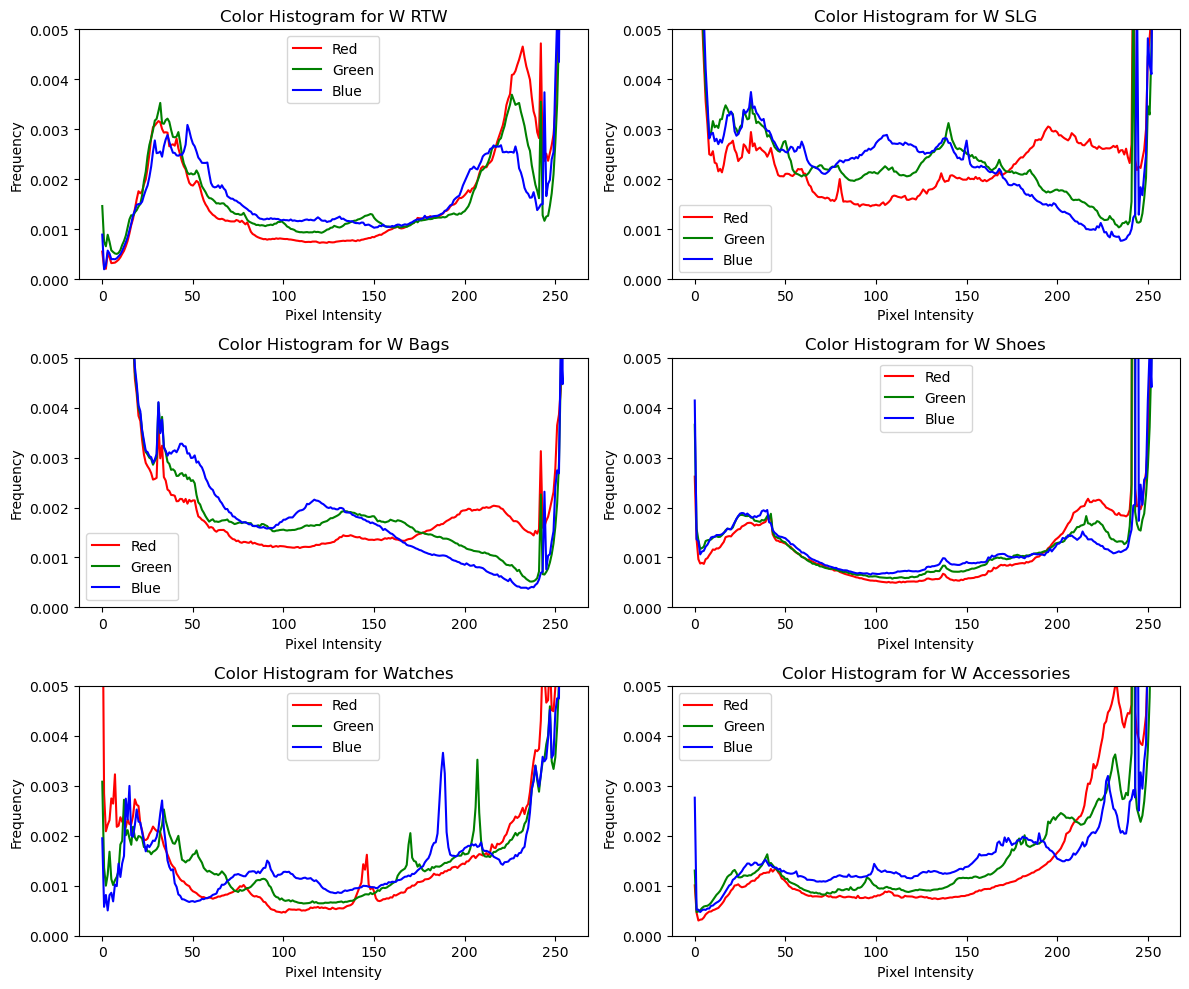

In [39]:
# Number of rows and columns for the grid
nrows, ncols = 3, 2

# Create a figure with subplots in a 3x2 grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display histograms for each category in the 3x2 grid
for i, (category, histograms) in enumerate(category_histograms.items()):
    if i >= nrows * ncols:
        break  # If there are more categories than subplots, we stop plotting

    ax = axes[i]
    ax.plot(histograms["r_hist"], color='red', label='Red')
    ax.plot(histograms["g_hist"], color='green', label='Green')
    ax.plot(histograms["b_hist"], color='blue', label='Blue')
    ax.set_title(f"Color Histogram for {category}")
    ax.set_xlabel("Pixel Intensity")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0, 0.005)
    ax.legend()

# Adjust layout so that the subplots fit neatly
plt.tight_layout()
plt.show()
